# Fase 1 - Proyecto Machine Learning

In [102]:
#librerias y funciones
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#Opcion usando SVD
def red_imagen_2(img_or, path, k):
    img = Image.open(path + img_or).convert('L') #Conversion a grises
    A = np.array(img) #Conversion matricial
    U,S,VT = np.linalg.svd(A, full_matrices=False) #SVD

    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    VT_k = VT[:k, :]

    A_2 = np.dot(U_k, np.dot(S_k, VT_k))

    A_2 = np.clip(A_2, 0, 255).astype(np.uint8) #Asignación de tonos RGB

    imagen_red_path = path + 'Fase1_ML - img_output_SVD.jpg'
    img_red.save(imagen_red_path)

    return img_red

#Opcion sin usar SVD
def red_imagen(img_or, path, res_nueva):
    imagen = Image.open(path + img_or)

    img_red = imagen.resize(res_nueva, Image.LANCZOS)

    imagen_red_path = path + 'Fase1_ML - img_output.jpg'
    img_red.save(imagen_red_path)

    return img_red

## Ejercicio 1

Revisa:
- Las operaciones con escalares, vectores y matrices
- Los diferentes tipos de normas (Manhattan y Euclidiana) y sus diferentes usos
- La descomposición matricial en valores singulares y su interpretación geométrica
- Las características del espacio de probabilidad, las variables aleatorias y los diferentes tipos de distribuciones de probabilidad
- El teorema de Bayes y su aplicación para solucionar problemas probabilísticos
- Los métodos de optimización y sus diferentes implementaciones

### Situacion

En una planta industrial se está considerando la introducción de un vehículo inteligente que sea capaz de trasladarse de forma autónoma a través de las instalaciones y de transportar los productos desde el área de almacenamiento central hasta las diferentes zonas de manufactura. La empresa tiene tres áreas de manufactura y cada producto se encuentra empacado en un contenedor específico que identifica el área a la que pertenece.

Aplicando el pensamiento lógico y analítico, modela la situación planteada anteriormente y determina, a partir de tus conocimientos actuales, cuales serían los componentes de aprendizaje automático que consideres necesarios incluir para implementear la solución

### Solución - planteamiento

Inicialmente, se cuenta con un problema de incorporar un vehículo inteligente, el cual se trasladará a traves de las instalaciones y de transportar *n* cantidad de productos. Al contar con 3 áreas de manufactura, cada una presentará distintas problemáticas y/o obstaculos, siendo estos insumos para alimentar al modelo, comenzando por la definición de las posibles variables.

Utilizando los temas revisados anteriormente y alguna forma de incorporarlos, empezaremos por:

**Las operaciones con escalares, vectores y matrices**

Al existir 3 posibles mínimas rútas desde los distintos puntos de manufactura (llamémosles A, B y C). Dichas rutas presentan distintos obstáculos y/o retos para el vehículo, por ende, al considerar las distintas variables al entorno de las rutas, es relevante considerar distintas matrices que impacten de la siguiente manera:

$$\begin{matrix}
Rutas & A & B & C \\
Ruta_{1} & R_{A_{1}} & R_{B_{1}} & R_{C_{1}} \\
Ruta_{2} & R_{A_{2}} & R_{B_{2}} & R_{C_{2}} \\
Ruta_{3} & R_{A_{3}} & R_{B_{3}} & R_{C_{3}} \\
\vdots   & \vdots & \vdots & \vdots \\
Ruta_{n} &  R_{A_{n}} & R_{B_{n}} & R_{C_{n}}  
\end{matrix}$$

Donde $R_{x_{z}}$ donde $x \in N$ y $z \in N$ Representa cualquier posible ruta implicando sus costos y obstáculos, pero, ¿Cómo está compuesta ese costo y obstáculo? Esa respuesta podría ser utilizando el siguiente tema.

**Los diferentes tipos de normas (Manhattan y Euclidiana) y sus diferentes usos**

Como bien se sabe, la distancia entre un punto $X,Y$ donde cada valor representa un punto sobre un punto cartesiano y se puede obtener su distancia. Si esto se utilizara para obtener la distancia de las posibles rutas mencionadas anteriormente, sin embargo, dicha distancia de calcula de manera lineal y como bien se sabe, un camino està compuesto de esquinas, por ende, la distancia final está compuesta de distintos puntos intermedios, de igual manera, el hecho que sean más pasos, no significa que sea el camino más largo, entonces, se obtendría la distancia final de la siguiente manera

$$\begin{matrix}
Punto & DistPunto_{1} & DistPunto_{2} & \cdots & DistPunto_{n} & \cdots & DistPunto_{n+m} & \cdots & DistPunto_{n+m+p} & DistFinal\\
A & DPA_{1} & DPA_{2} & \cdots & DPA_{n} & \cdot & DPA_{n+m} & \cdots & DPA_{n+m+p} & \sum_{i=1}^{n+m+p} DPA_{i} \\
B & DPB_{1} & DPB_{2} & \cdots & DPB_{n} & \cdot & 0 & \cdots & 0 & \sum_{i=1}^{n} DPB_{i} \\
C & DPC_{1} & DPC_{2} & \cdots & DPC_{n} & \cdot & DPC_{n+m} & \cdots & 0 & \sum_{i=1}^{n+m} DPC_{i}
\end{matrix}$$

De esta información necesitaremos de *DistFinal* para el modelo 

**Las características del espacio de probabilidad, las variables aleatorias y los diferentes tipos de distribuciones de probabilidad**

Como su nombre lo menciona, utilizando herramientas de probabilidad y variables aleatorias, se pueden plantear distintos escenarios que podrían representar un valor relevante para cada ruta dependiendo del punto de partida, tales como el valor de gasolina, número de baches, obstáculos en general, tráfico a diferentes horas, etc. Cada una de esas variables pueden presentarse como modelos de variables aleatorias, presentándose como una distribución asociada a una función de probabilidad (la función normal puede ser representada como el tráfico, siendo la hora pico el valor más alto de tiempo que se emplea para trasladarse de punto A, B o C al destino, entre más temprano o más tarde, el tráfico disminuye y por ende, el tiempo también)

**El teorema de Bayes y su aplicación para solucionar problemas probabilísticos**

Utilizando el ejemplo anterior, en caso que se presenten distintos inconvenientes a lo largo del camino, las probabilidades cambiarán, por ejemplo, utilizando el ejemplo del tráfico, si fuera de la hora pico existe un accidente, el tiempo de arrivo a la zona de manufactura aumentará, esto debido a un inconveniente externo a la hora del día. Por ende, utilizar el teorema de Bayes es relevante

### Ejercicio 2

Considerando la incorporación disponibles de una plataforma en la nube (por ejemplo IBM Cloud) y conociendo que el vehículo puede conectarse a esta de alguna forma. ¿Cuáles serían las nuevas características que podrías agregarle a tu solución para mejorar aún más la propuesta inicial?

Considerando que se puede agregar información de manera streaming, podría incluirse el tiempo exacto que se utiliza entre los posibles traslados, así como los posibles obstáculos con los que se afronta el vehiculo entre los 3 mínimos posibles rutas. De igual manera, agregar las distintas rutas que se tienen que tomar considerando los imprevistos, por ejemplo, supóngase que la ruta más optima del punto A a la zona de destino corresponde de n pasos, pero durante el punto $n-4$ a $n-5$ están realizando operaciones o hay una manifestación que impide el paso, el vehículo tendrá que tomar otra ruta, aumentando o disminuyendo el número óptimo de pasos para llegar al destino

Dichos pasos alimentan el modelo, de tal manera que este se optimiza de mejor manera

### Ejercicio 3

Se conoce que un vehículo como el descrito puede tener una o varias cámaras incorporadas, cuya resolución de captura es de 1920 x 1080 pixeles. Si la máxima calidad con la que se puedden transmitir las imágenes a través de la red está limitada a la tercera parte de la resolución original, desarrolla un programa que sea capaz de realizar esta reducción con la menor pérdida posible.

In [85]:
if __name__ == '__main__':
    path = 'datos/'
    img_or = 'data/Fase1_ML - img_input.jpg'
    ancho_n = 1920//3
    alto_n = 1080//3
    nueva_res = (ancho_n, alto_n)

    ruta_img_red = red_imagen(img_or, path, nueva_res)

    print('La imagen fue guardada con exito')

La imagen fue guardada con exito


Imagen inicial

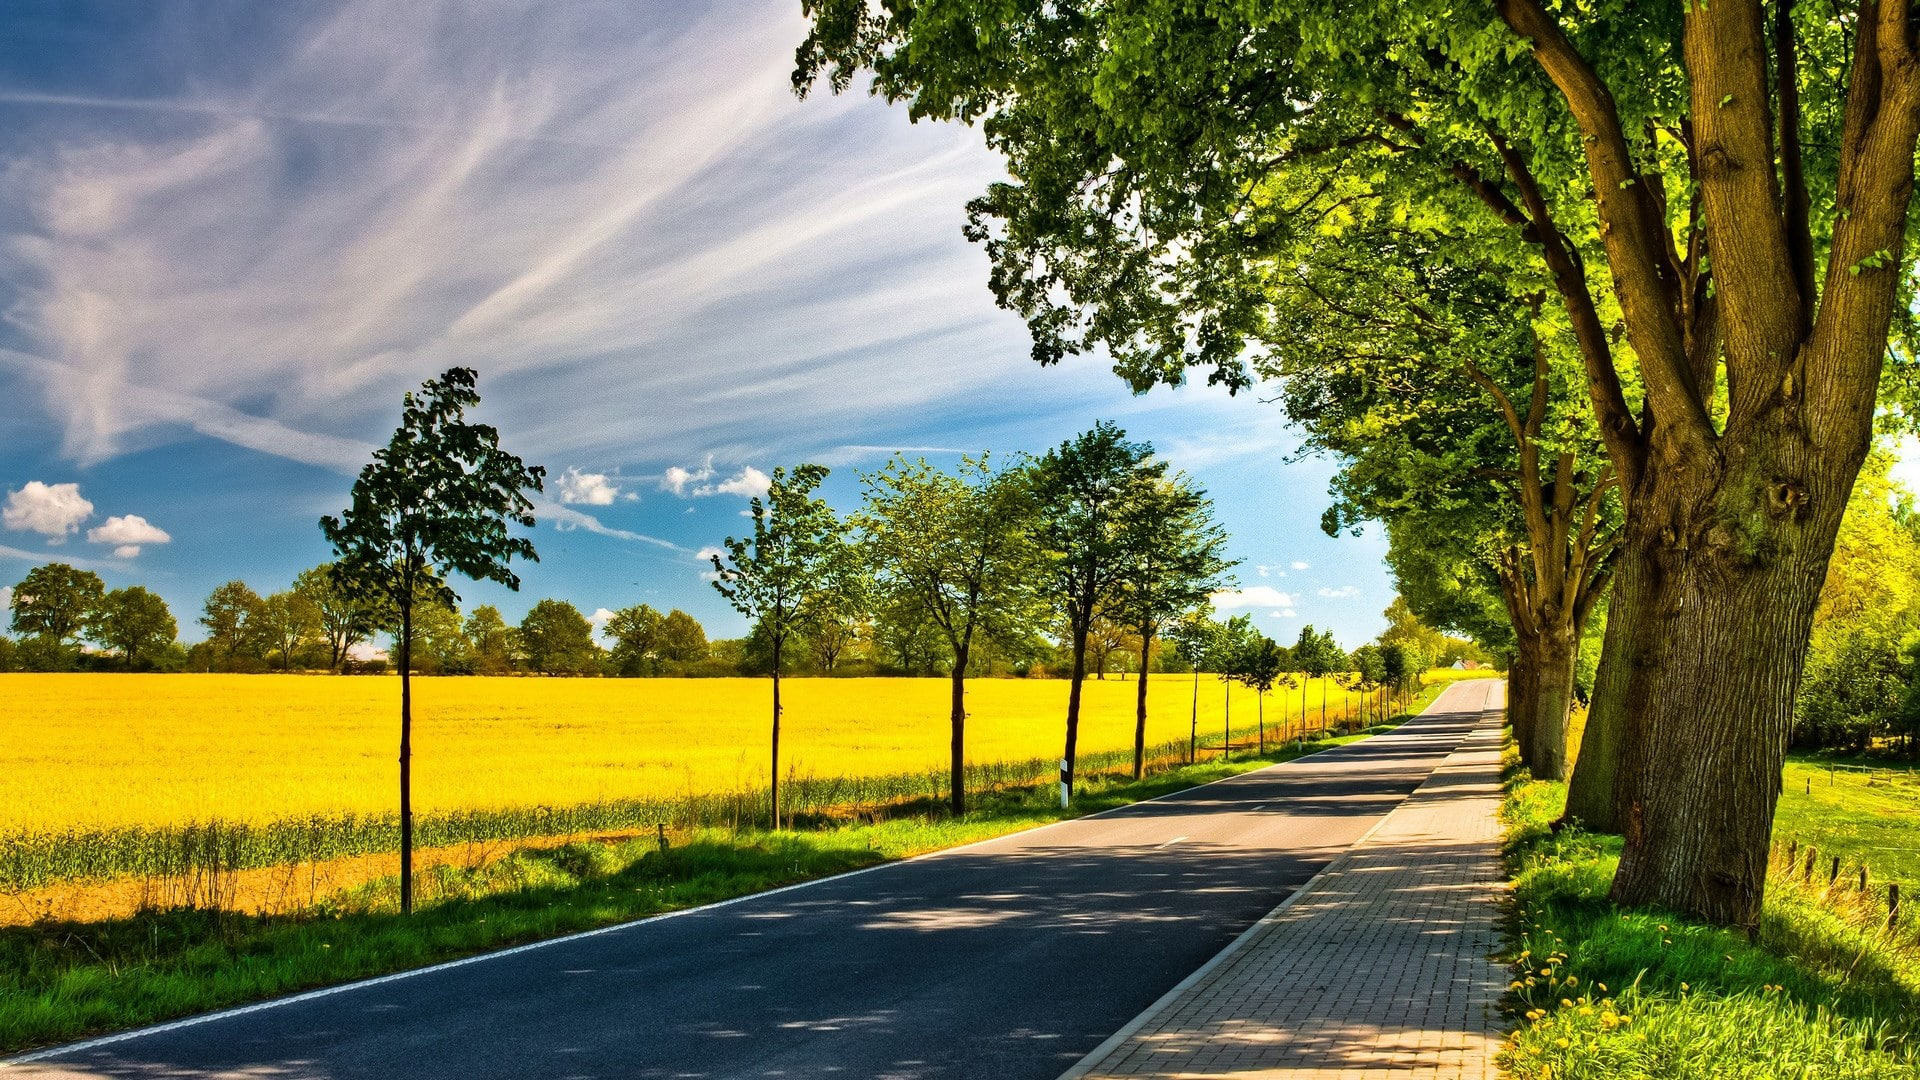

In [87]:
Image.open('data/Fase1_ML - img_input.jpg')

In [89]:
#Inicio
img_or = Image.open('data/Fase1_ML - img_input.jpg')
print(img_or.size)

(1920, 1080)


Imagen reducida

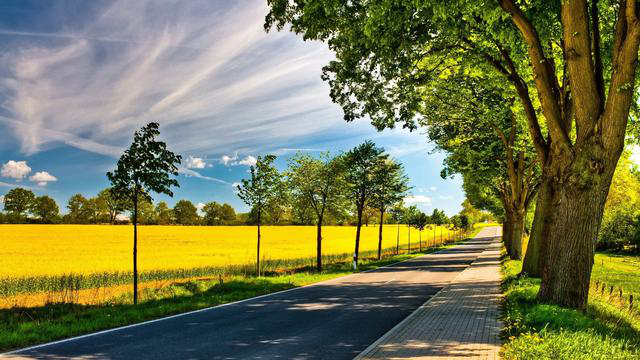

In [91]:
Image.open('datos/img_red.jpg')

In [93]:
#Fin
img_red = Image.open('data/Fase1_ML - img_output.jpg')
print(img_red.size)

(640, 360)


#### Usando SVD

In [106]:
path = 'datos/'
img_or = 'imagen_2.jpg'
k=50

img_red = red_imagen_2(img_or, path, k)

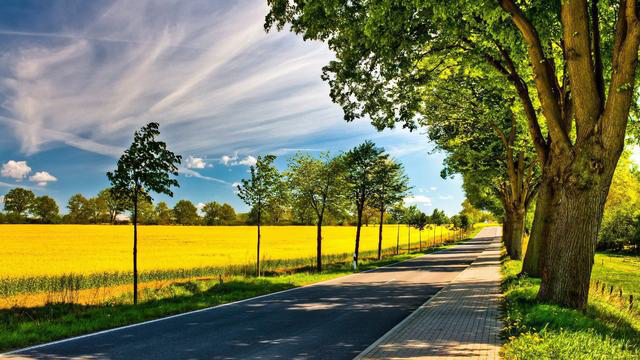

In [108]:
Image.open('data/Fase1_ML - img_output_SVD.jpg')

In [110]:
#Fin
img_red = Image.open('datos/img_red_SVD.jpg')
print(img_red.size)

(640, 360)
